### Look up what the Arithmetic-Geometric mean of two numbers is. 
### Given two numbers, calculate their AGM
### Decide on a range of numbers and for every pair in this range, calculate their AGM and plot it


##### 1. Looked for the constraints for AM and GM
##### 2. Developed understanding of how to calculate AGM 


In [12]:
#Standard Imports
import numpy as np
import random
import matplotlib.pyplot as plt
from itertools import combinations 
import pandas as pd
from typing import Iterator, Tuple

##### The formula for GM involves square root and so it is necessary to check if both the numbers are whole numbers

In [2]:
def is_valid_for_sq_root(n1 :int ,n2 : int)  -> int:
    """ Check if numbers are valid since sq cannot be performed on negative numbers """
    if (n1<0 and n2 <0):
         valid_flag = 1
    elif (n1>0 and n2 >0):
         valid_flag = 1
    else :
        valid_flag = 0
    return valid_flag



##### The formula to calculate AM & GM  is taken from the following link: https://en.wikipedia.org/wiki/Arithmetic%E2%80%93geometric_mean#Example

In [13]:
def calculate_am_and_gm(n1 :int ,n2 : int )-> Tuple[int, int]:
    """Calculate AM and GM  """
    a = (n1+n2)/2
    g = np.sqrt(n1*n2)
    return (a, g)

##### AM and GM converge to a number and that number is known as AGM. In this case, I am using a precision level of 10 digits.


In [4]:
def calculate_agm(n1:int,n2:int, a1 = None, g1 = None, alist= None,glist= None )-> Iterator[int]:
    #
    a1 = n1
    g1 = n2
    alist = [a1]
    glist= [g1]
    #AM and GM converge to the same number i.e. Arithemetic Geometric mean
    while (a1!=g1):
        agm_intr = calculate_am_and_gm(a1, g1)
        a1 = agm_intr[0]
        g1 = agm_intr[1]
        alist.append(a1)
        glist.append(g1)
        a1 = round(a1,10) # Setting precision to 10 decimals
        g1 = round(g1,10) # Setting precision to 10 decimals
        #print(a1,g1)
    print("The AGM of {n1} and {n2} is : {a1}, and  {g1}".format(n1= n1, n2=n2,a1=a1, g1=g1))
    #print(alist, glist)
    
    return [a1,g1, alist, glist]



##### Creating a list of random numbers. Trying to consider lists that do not have duplicates

In [5]:
# Numbers List 
numbers_list = []
for i in range(0,5):  #I am limiting the list of numbers to contain 5 elements
    n = random.randint(1,30) # Choosing the numbers to be in the range of 1-30
    numbers_list.append(n)
#Ensuring there are no duplicates
numbers_list = list(dict.fromkeys(numbers_list))
numbers_list

[29, 27, 3, 8, 7]

##### Plotting AGM for each pair in the above list


In [8]:
def agm_plot( numbers_list, list_of_agms= None):
    fig = plt.figure(figsize=(10,30))
    # Generating combinations of numbers in the list to contain 2 elements
    comb = combinations(numbers_list, 2) 
    list_of_agms = {}

    # Print the obtained combinations 
    for index, i in enumerate(list(comb)):
        items = list(i)
        n1 = items[0]
        n2 = items[1]
        #print(items[0], items[1])
        agm = calculate_agm(items[0], items[1])
        # This is AGM for two numbers
        agm_val = agm[0]
        
        plt.subplot(10, 1, (index+1))
        plt.title('Number1 = {n1} and Number2 = {n2} :AGM = {agm_val}'.format(n1=n1, n2= n2, agm_val= agm_val))
        x_axis = list(range(1, (len(agm[2])+1) ))

        am = agm[2]
        gm = agm[3]

        ax1 = plt.plot(x_axis,am, label = 'AM' )
        ax2 = plt.plot(x_axis,gm, label = 'GM')
        plt.xticks([])
        plt.legend()


Numbers List:  [29, 27, 3, 8, 7]
The AGM of 29 and 27 is : 27.9910678672, and  27.9910678672
The AGM of 29 and 3 is : 12.4389906821, and  12.4389906821
The AGM of 29 and 8 is : 16.8260688168, and  16.8260688168
The AGM of 29 and 7 is : 16.0690975038, and  16.0690975038
The AGM of 27 and 3 is : 11.8087065109, and  11.8087065109
The AGM of 27 and 8 is : 16.0678923995, and  16.0678923995
The AGM of 27 and 7 is : 15.3307120244, and  15.3307120244
The AGM of 3 and 8 is : 5.1951431212, and  5.1951431212
The AGM of 3 and 7 is : 4.7890135832, and  4.7890135832
The AGM of 8 and 7 is : 7.4916550642, and  7.4916550642


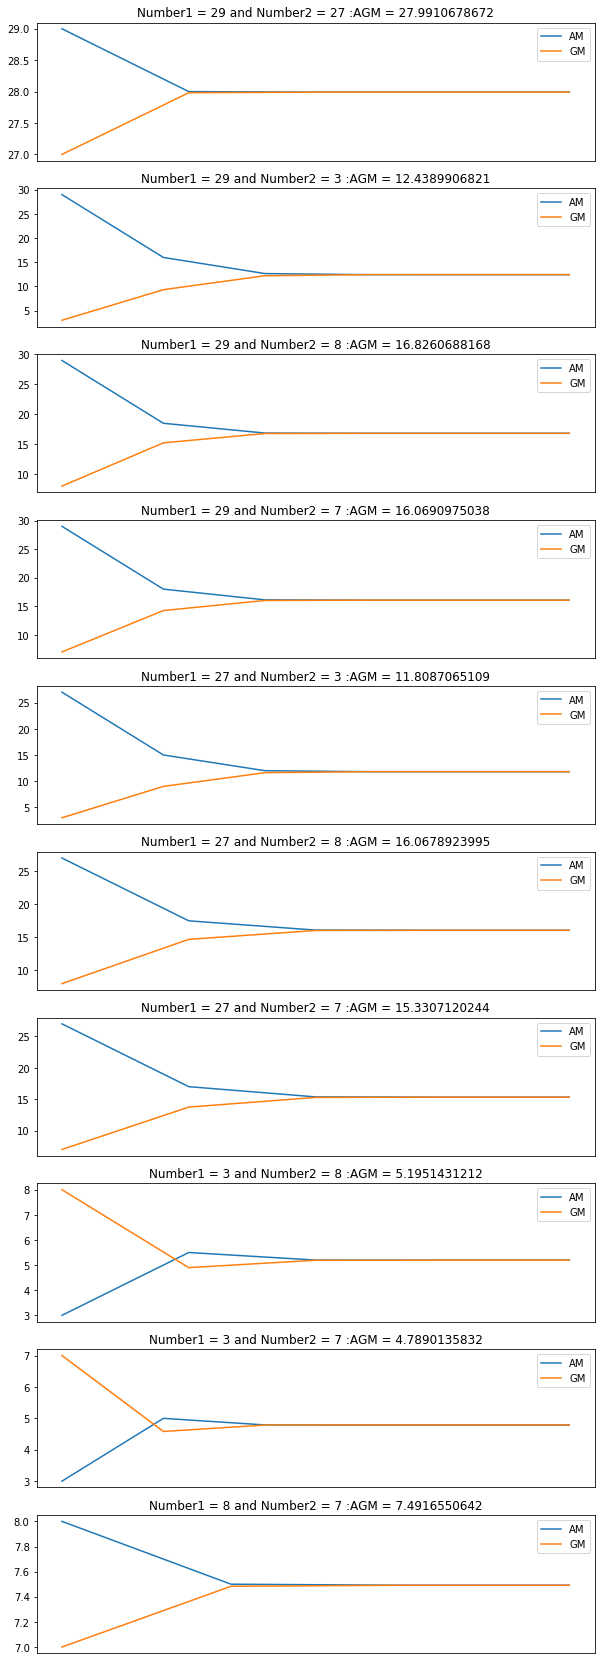

In [9]:
print('Numbers List: ', numbers_list)
agm_plot(numbers_list)